In [1]:
########################################################################
# Date:			2014-12-08, copied on 2017-11-26 by J. Hall
# Purpose:		PIC1D1V
# Author:		A. Marocchino by La Sapienza University of Rome
# Source:		python
########################################################################

# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
# 
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
# 
# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

In [1]:
### loading shell commands
import os, os.path, sys
import math
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt

In [2]:
#--- charge deposition  ---#

#particle_deposition : a 3-variable function which loads particles
#into the system.
#pos: the initial positions of the particles on the line
#dx: spacing between points on the line
#NGP: number grid points
#v: cell number


def particle_deposition(pos,dx,NGP):
	weights = np.zeros((NGP,1))
	for i in range(0,len(pos)):
		v=np.floor(pos[i]/dx)
		weights[int(v)] += 1.-(pos[i]/dx-v)
		weights[int(v)+1] += pos[i]/dx-v

 	weights[0]+=weights[-1] #periodic BC
	
	return weights[0:NGP-1]

In [3]:
#--- E-field calculator ---#
#--- finite difference scheme ---#
def E_calculator_potential(rho,NGP,dx):
	NG=NGP-1
	source = +rho[0:NG]*dx**2
	M=np.zeros((NG,NG))
	for i in range(0,NG):
		for j in range(0,NG):
			if i == j:
				M[i,j]=+2.
			if i == j-1:
				M[i,j]=-1.
			if i == j+1:
				M[i,j]=-1.
	M[0,NG-1]=-1.0
	M[NG-1,0]=-1.0

	Phi=np.linalg.solve(M, source)

	Efield=np.zeros((NGP,1))
	for i in range(1,NG-1):
		Efield[i] = (Phi[i+1]-Phi[i-1]) / 2. / dx
	Efield[NG-1] = (Phi[0]-Phi[NG-2]) / 2. / dx
	Efield[0] = (Phi[1]-Phi[NG-1]) / 2. / dx
	Efield[NG]=Efield[0]
	Efield=-Efield

# 	print M
# 	print Phi
#  	print Efield
#  	exit(0)
	

	return Efield


In [4]:
#--- pusher ---#
def velocity_pusher(particle_position,particle_velocity,gamma,Efield,dx,dt):
	for i in range(0,len(particle_velocity)):
		v=np.floor( particle_position[i] /dx)
		w1= 1.-(particle_position[i]/dx-v)
		w2= 1.-w1
		particle_velocity[i] += QM * (w1*Efield[int(v)]+w2*Efield[int(v)+1])*dt
	return particle_velocity, gamma

def particle_pusher(particle_position,particle_velocity,dt,L):
	for i in range(0,len(particle_position)):
		particle_position[i] += particle_velocity[i]*dt
		if particle_position[i]>=L:
			particle_position[i] -= L
		if particle_position[i] < 0:
			particle_position[i] += L
	return particle_position	

In [13]:
#--- Inputs ---#
NGP = 400
L   = 2.*np.pi/3.0600
dt = 0.2
Number_Particles = 800
initial_velocity  	= 0.2
initial_th_velocity = 0.0
XP1 = 0.1
VP1 = 0.00
mode = 1.

cycles = 2000

In [14]:
#-constants
WP=1.0
QM=-1.0
c=1.0
Q=WP**2/(QM*Number_Particles/L)			# computational particle charge
rho_back=-Q*Number_Particles/L			# background charge given by background (not moving) ions

In [15]:
#--- Initialize ---#
dx = L/(1.*NGP-1)
particle_position = np.linspace(0.,L,Number_Particles+1)[0:-1]
#particle_position = np.linspace(0,L-L/Number_Particles,Number_Particles)
particle_velocity = initial_th_velocity * np.random.standard_normal((Number_Particles,))
particle_velocity[range(0,Number_Particles-1,2)]=initial_velocity
particle_velocity[range(1,Number_Particles,2)]=-initial_velocity

particle_velocity = np.divide( (particle_velocity+VP1*np.sin(2.*np.pi*particle_position/L*mode) ), (1.+particle_velocity*VP1*np.sin(2.*np.pi*particle_position/L*mode)/c**2))
gamma = np.sqrt( (1./(1.-(particle_velocity/c)**2) ) )
u_particles=np.zeros((Number_Particles,))
for i in range(0,Number_Particles):
	u_particles[i] = gamma[i]*particle_velocity[i]
for i in range(0,Number_Particles):
	particle_position[i] += XP1*(L/Number_Particles)*np.sin(2.*np.pi*particle_position[i]/L*mode);
	if particle_position[i]>=L:
		particle_position[i] -= L
	if particle_position[i] < 0:
		particle_position[i] += L

0


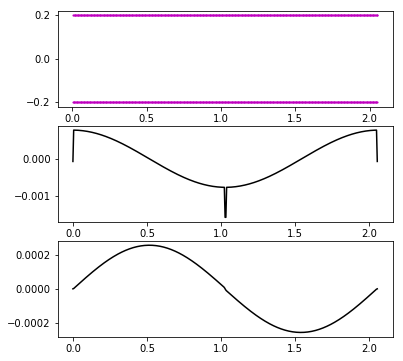

10
20
30
40
50
60
70
80
90
100


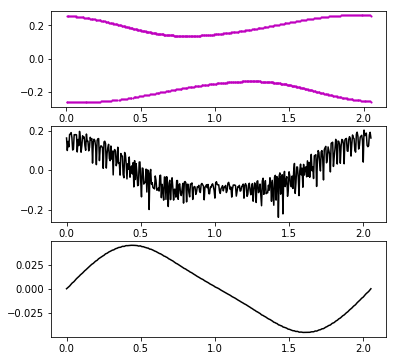

110
120
130
140
150
160
170
180
190
200


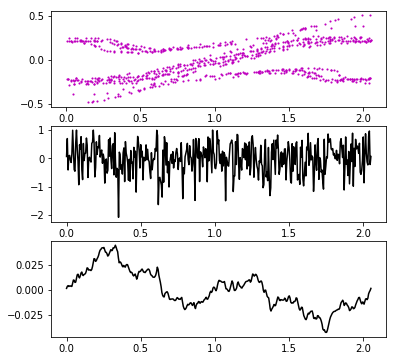

210
220
230
240
250
260
270
280
290
300


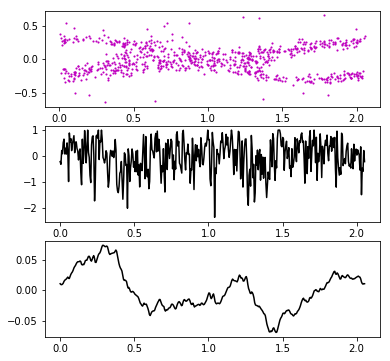

310
320
330
340
350
360
370
380
390
400


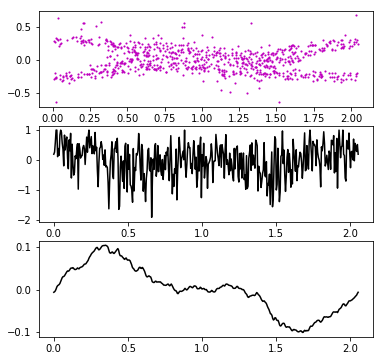

410
420
430
440
450
460
470
480
490
500


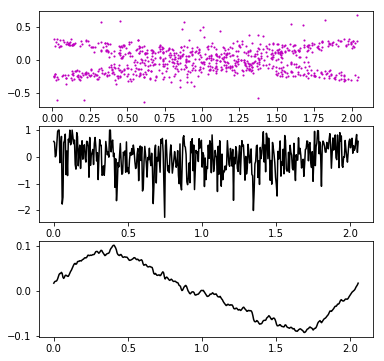

510
520
530
540
550
560
570
580
590
600


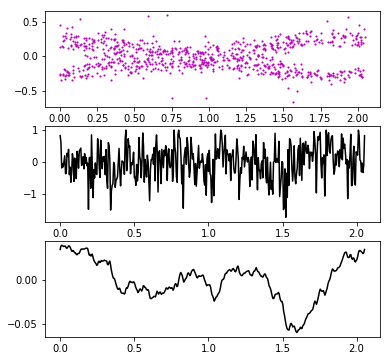

610
620
630
640
650
660
670
680
690
700


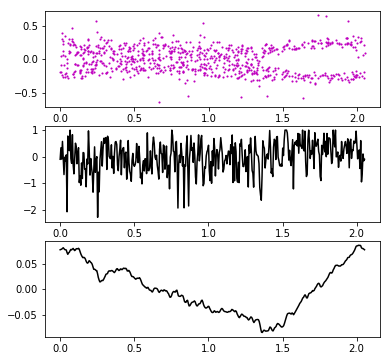

710
720
730
740
750
760
770
780
790
800


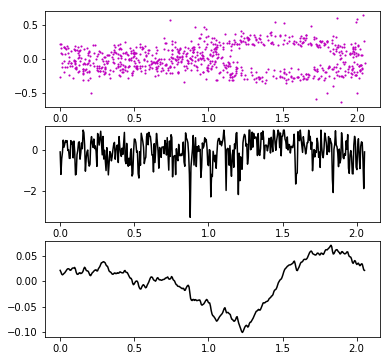

810
820
830
840
850
860
870
880
890
900


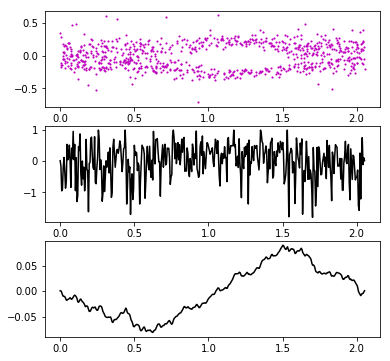

910
920
930
940
950
960
970
980
990
1000


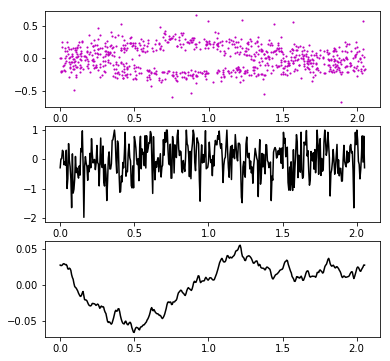

1010
1020
1030
1040
1050
1060
1070
1080
1090
1100


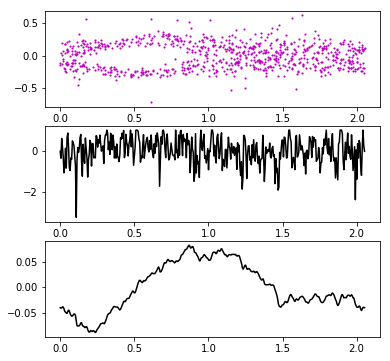

1110
1120
1130
1140
1150
1160
1170
1180
1190
1200


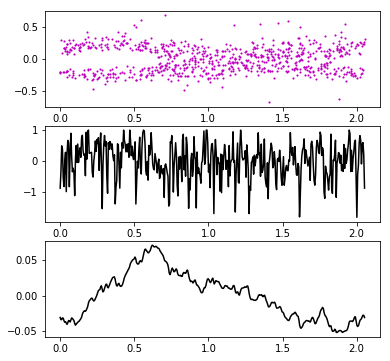

1210
1220
1230
1240
1250
1260
1270
1280
1290
1300


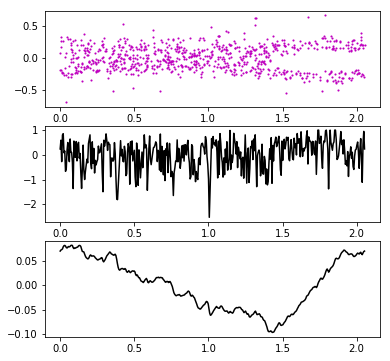

1310
1320
1330
1340
1350
1360
1370
1380
1390
1400


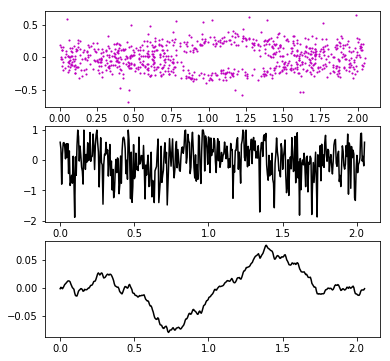

1410
1420
1430
1440
1450
1460
1470
1480
1490
1500


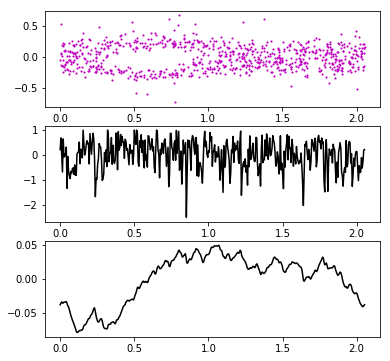

1510
1520
1530
1540
1550
1560
1570
1580
1590
1600


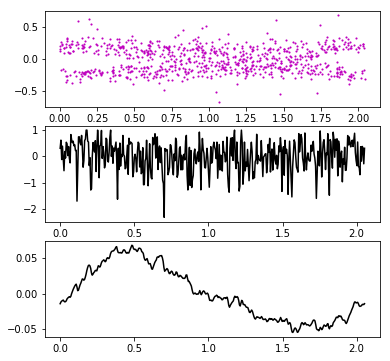

1610
1620
1630
1640
1650
1660
1670
1680
1690
1700


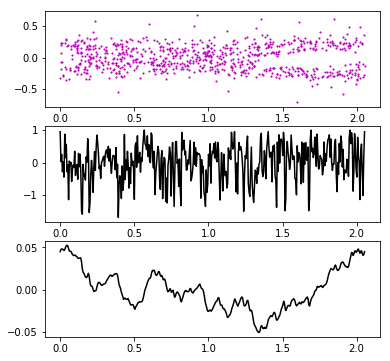

1710
1720
1730
1740
1750
1760
1770
1780
1790
1800


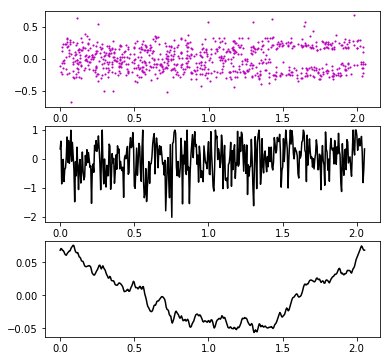

1810
1820
1830
1840
1850
1860
1870
1880
1890
1900


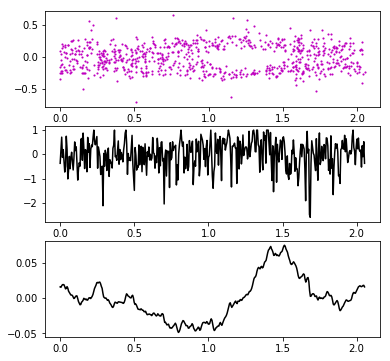

1910
1920
1930
1940
1950
1960
1970
1980
1990
2000


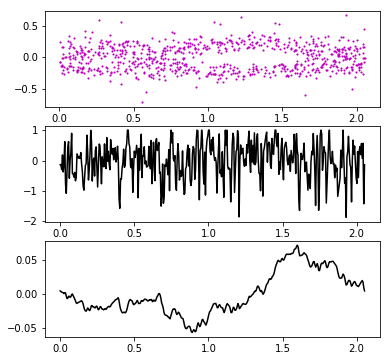

In [16]:
# --- main -- #
# --- --- --- #
for count in range(0,cycles+1):

	rho = particle_deposition(particle_position,dx,NGP)
	rho = Q/dx*rho+rho_back
	#print rho
#---#
####	Efield = E_calculator_FEM(rho,NGP,dx)
	Efield = E_calculator_potential(rho,NGP,dx)
#---#

	particle_velocity, gamma 	= velocity_pusher(particle_position,particle_velocity,gamma,Efield,dx,dt)
	particle_position 			= particle_pusher(particle_position,particle_velocity,dt,L)


	if count%10 == 0:
		print(count)

	if count%100==0 or count==cycles:
		fig = plt.figure(1, figsize=(6.0,6.0))
		ax1 = plt.subplot(311)
		ax1.plot(particle_position,particle_velocity,'om',ms=1.1)
		ax2 = plt.subplot(312)
		ax2.plot(np.linspace(0,L,len(rho)),np.append(rho[0:-1],rho[0]),'k')
		ax3 = plt.subplot(313)
		ax3.plot(np.linspace(0,L,len(Efield)),Efield,'k')
		plt.show()

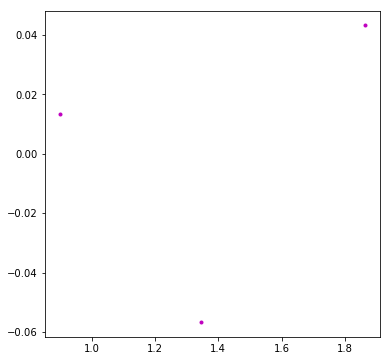

In [15]:
# --- final output --- #
fig = plt.figure(1, figsize=(6.0,6.0))
plt.plot(particle_position,particle_velocity,'.m')
plt.show()